# Ada homework 5 - Taming Text

In this homework, we aim to extract useful information from a whole lot of emails, that were leaked during the USA presidential elections of 2016, and concerning Hilary Clinton. We will use data analysis methods, as well as machine learning.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import pycountry

The very first thing to do is naturally to import all the emails, under 2 forms : raw text which basically is all the emails concatenated, and a list containing each email.

In [2]:
raw_text = open ('hillary-clinton-emails/Emails.csv', 'r', encoding='utf-8').read ()

In [3]:
raw_emails = open('hillary-clinton-emails/Emails.csv', 'r', encoding='utf-8').readlines ()

# Question 1: Word Cloud

This first task consists of some kind of visualization. We are willing to extract the most meaningful and important words out of all those emails, and draw an image with it, that will visually concretize those importances.

A cool word visualization can be achieved using the python library 'wordcloud'. An example is shown right below using the raw text generated from emails.

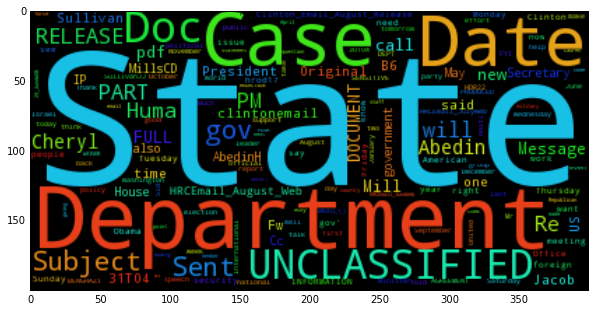

In [4]:
raw_word_cloud = WordCloud ().generate (raw_text)
plt.figure(figsize=(10,10))
plt.imshow (raw_word_cloud)

In this cool image, the size of a word tells us about his importance (basically how many times we can find it in the emails).

But here, no relevant information can be found, except the fact that we are dealing with the government (or army, quite same vocabulary), because of those words 'State', 'Department', etc... which is not new since those emails belong to Hilary Clinton.

To make more sense out of those emails, we shall use some text processing first.

## Text Processing

Now it is all about cleaning the text to refine important information. This is also some kind of noise reduction. We will go through several techniques to refine the whole email text.

### Tokenizing

In order to process the text, we should better be working on the words themselves. So, to work with comfort, we could use some method called "Tokenizing", which basically fragments a text into a list of words.

In [5]:
raw_tokens = word_tokenize (raw_text)
raw_tokens [666:676]

['National', 'Libyan', 'Council', '(', 'NLC', ')', ',', 'and', 'its', 'leader']

### Stop-words

There is something we should consider though. Take the example of the word "to". This word has no information, it is only here for grammar purposes, but it will most likely alter the results because it is a common word.

Such words are called "stop-words". Luckily, Natural Language Toolkit (NLTK) has a list of all english stop-words.

In [6]:
stop_words = set (stopwords.words ('english'))
'to' in stop_words

True

To these words, we can add custom "stop-words", like the meaningless ones we noticed from the raw word cloud.

In [7]:
stop_words.update (set (['state', 'date', 'subject', 'department', 'unclassified', 'doc', 'sent', 'case', 'part', 'pdf',
                          'gov', 'com', 'release', 'document', 'would', 'said', 'n\'t', 'pm', 'am', 'message', 'documents',
                          'new', 'cc', 'us', 'fw']))

We can now remove all those stop-words from our token list.

In [8]:
clean_tokens = [token for token in raw_tokens if token.lower () not in stop_words]
print ('With stop-words : ', len (raw_tokens), ' tokens')
print ('Without stop-words : ', len (clean_tokens), ' tokens')

With stop-words :  4911626  tokens
Without stop-words :  3221752  tokens


This is quite more than we expected. There are still 3,236,931 tokens, which is a lot. But let's now have a look at our word cloud. We first have to build a text out of all tokens concatenated.

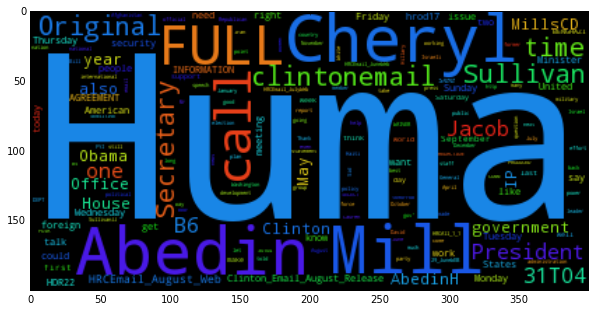

In [9]:
clean_text = ''

for token in clean_tokens:
    clean_text += token + ' '

clean_word_cloud = WordCloud (stopwords = stop_words).generate (clean_text)
plt.figure(figsize=(10,10))
plt.imshow (clean_word_cloud)

This is much more satisfying. We can recognize a few relevant words here. We notice in particular that the following are often mentionned :

- "Huma Abedin": Huma Mahmood Abedin is an American political staffer who was vice chair of Hillary Clinton's 2016 campaign for President of the United States

- "Cheryl Mills" : Cheryl D. Mills is an American lawyer and corporate executive. She first came into public prominence while serving as deputy White House Counsel for President Bill Clinton, whom she defended during his 1999 impeachment trial

- "Jacob" : Jacob Jeremiah Sullivan (born November 28, 1976) is an American policymaker and a senior policy advisor to Hillary Clinton's 2016 election campaign, with expertise in foreign policy

- We also notice words like: clintonemail, president, Obama, government

But we could go deeper. We could use something called "stemming".

### Stemming : Lancaster

Take the example of the word "love". "loved" is another instance of this word, but spelles differently, thus being handled like a different word. So why not collapsing all instances of a word into this very word ? That is called stemming.

We are going to use the Lancaster stemmer, provided in NLTK

In [10]:
lancaster_stemmer = LancasterStemmer ()

lancaster_stemmed_tokens = [lancaster_stemmer.stem (token) for token in clean_tokens]
print ('Without stemming : ', len (set (clean_tokens)), ' different tokens')
print ('With stemming : ', len (set (lancaster_stemmed_tokens)), ' different tokens')

Without stemming :  121767  different tokens
With stemming :  90956  different tokens


This looks good. We managed to collapse 25% of our tokens. Now let us have a look at the new word cloud that comes from this.

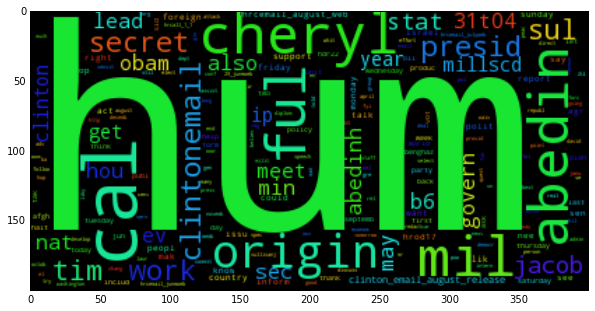

In [11]:
lancaster_stemmed_text = ''

for token in lancaster_stemmed_tokens:
    lancaster_stemmed_text += token + ' '

lancaster_stemmed_word_cloud = WordCloud (stopwords = stop_words).generate (lancaster_stemmed_text)
plt.figure(figsize=(10,10))
plt.imshow (lancaster_stemmed_word_cloud)

Quite a mess here. 'Huma' became 'hum'. 'call' became 'cal'. As weird as it may seem, this is due to the type of stemmer we used. We can even see that 'Secretary' has become 'secret', which has absolutely nothing to do with it. We should try another stemmer : the Porter one, also provided in NLTK.

### Stemming : Porter

In [12]:
porter_stemmer = PorterStemmer ()

porter_stemmed_tokens = [porter_stemmer.stem (token) for token in clean_tokens]
print ('Without stemming : ', len (set (clean_tokens)), ' different tokens')
print ('With stemming : ', len (set (porter_stemmed_tokens)), ' different tokens')

Without stemming :  121767  different tokens
With stemming :  107017  different tokens


Only 12% collapsed here, this twice less. But anyway, let's go on.

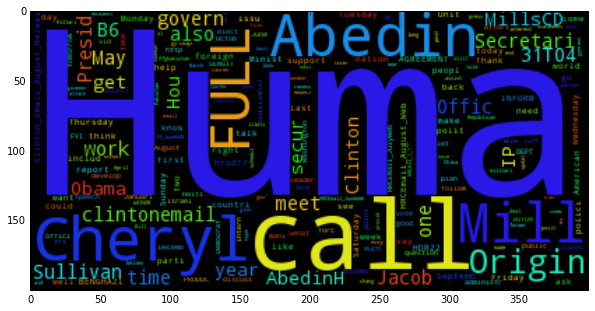

In [13]:
porter_stemmed_text = ''

for token in porter_stemmed_tokens:
    porter_stemmed_text += token + ' '

porter_stemmed_word_cloud = WordCloud (stopwords = stop_words).generate (porter_stemmed_text)
plt.figure(figsize=(10,10))
plt.imshow (porter_stemmed_word_cloud)

Here is what we can call a refined word cloud. We have less word than in the clean one, thus they are more enhanced. There are still some artifacts like 'President' becoming 'presid' or 'Secretary' becoming 'secretari', but it is way less messy than the Lancaster one.

# Question 2 : Country Perceptions

In this task we will focus on country references in those Hilary Clinton emails. How many times are they referenced ? How good/bad are they percepted ? Those are the questions we'll try our best to answer.

## References

To begin with such a task, we'll use another python library called "pycountry", to give us for each country its name, and alpha 2/3 characters.

We'll also lowercase the name, so that we can associate any case name to it in the emails. The same does no go for alphas as they may be connection words of the english language (like AM and am).

In [14]:
countries = list (pycountry.countries)

countries_df = pd.DataFrame ()
countries_df ['Name'] = [country.name.lower () for country in countries]
countries_df ['Alpha 2'] = [country.alpha_2 for country in countries]
countries_df ['Alpha 3'] = [country.alpha_3 for country in countries]

countries_df.head ()

,Name,Alpha 2,Alpha 3
0,aruba,AW,ABW
1,afghanistan,AF,AFG
2,angola,AO,AGO
3,anguilla,AI,AIA
4,åland islands,AX,ALA


This being done, we can now loop through each token that we generated in the previous task and count the number of tokens that matches one value of our country dataframe.

We cannot use stop-words or stemming in this one because it would most likely destroy alpha references.

In [15]:
countries_raw = countries_df.values
country_raw_references = {}

for token in raw_tokens:
    
    country = ''
    
    if token in countries_raw:
        country = token
    elif token.lower () in countries_raw:
        country = token.lower ()
        
    if len (country) > 0:
        if country in country_raw_references:
            country_raw_references [country] += 1
        else:
            country_raw_references [country] = 1
            
country_raw_references ['switzerland']

47

To make it collapse to join together every country reference that references to the same country, we'll have to use our dataframe. The main idea is to grab the location of a reference in the dataframe and clip its column index to 0.

In this new dictionary, we'll not store the country name, but its row index in the countries dataframe, for plotting purposes.

In [16]:
def collapseReferences (country_references, country_names):
    
    collapsed_references = {}
    
    for reference, occurences in country_references.items ():
        
        # Get the row index of the reference
        ix = np.where (country_names == reference) [0][0]
        
        if ix in collapsed_references:
            collapsed_references [ix] += occurences
        else:
            collapsed_references [ix] = occurences
            
    return collapsed_references

country_raw_collapsed_references = collapseReferences (country_raw_references, countries_raw)

A quick overview of what we just did :

In [17]:
print ('References to France :\n')
print ('France : ', country_raw_references ['france'])
print ('FR : ', country_raw_references ['FR'], '\n')
print ('Total references to France : ', country_raw_collapsed_references [np.where (countries_raw == 'france') [0][0]])

References to France :

France :  275
FR :  5 

Total references to France :  280


Now with this, we can plot the number of occurences of every country and compare.

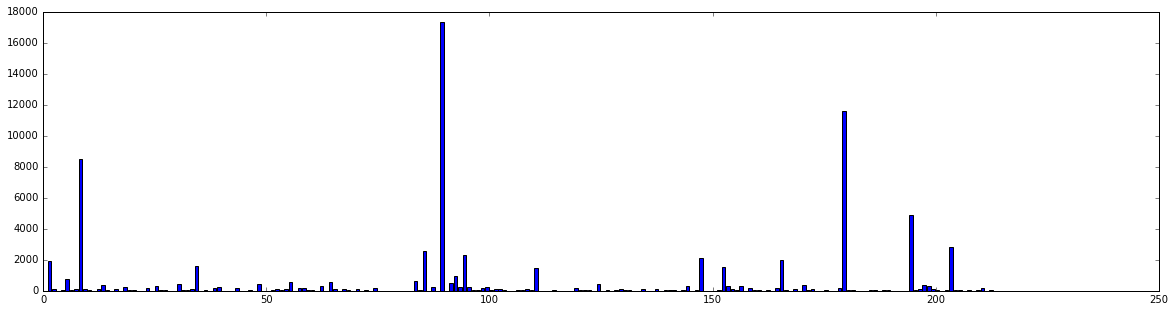

In [18]:
plt.figure (figsize=(20, 5))
plt.bar (range (len (country_raw_collapsed_references)), country_raw_collapsed_references.values ())

plt.show()

There is one huge problem to be noticed here. How is it that some countries are way more referenced than others ? Let us have a quick glance at the most referrenced countries.

In [19]:
country_occurences = pd.DataFrame ()
country_occurences ['Country'] = [countries_raw [i, 0] for i in country_raw_collapsed_references.keys ()]
country_occurences ['Alpha'] = [countries_raw [i, 1] for i in country_raw_collapsed_references.keys ()]
country_occurences ['Occurences'] = [o for o in country_raw_collapsed_references.values ()]

country_occurences.sort_values (['Occurences'], ascending=False).head ()

,Country,Alpha,Occurences
89,india,IN,17311
179,saint pierre and miquelon,PM,11609
8,armenia,AM,8532
194,tonga,TO,4915
203,united states,US,2848


This makes perfect sense. Those alphas are also small words of the english language (or typos, like 10 AM), which explains why they come up so often. So in order to avoid such a huge bias, we should get rid of those missinterpreted words.

But the task is not simple, as we need to use a threshold for dropping country references that will reduce this bias without creating another one, too big. What we can do though, is find the country full name that is referenced at most, and take its number of occurences as the threshold value.

In [20]:
threshold = max ([v for k, v in country_raw_references.items () if len (k) > 3])
c = [k for k, v in country_raw_references.items () if v == threshold] [0]

c, threshold

('haiti', 2567)

This means that our threshold value has to be 2567, which is the number of occurences of Haiti.

In [21]:
country_clamped_references = {}

for k, v in country_raw_references.items ():
    
    if v <= threshold:
        country_clamped_references [k] = v
        
print ('Number of biased references dropped : ', len (country_raw_references) - len (country_clamped_references))

Number of biased references dropped :  5


Only 5 biased references were dropped. That is a great cleaning because 5 won't harm the concerned countries but will reduce a lot the bias. Now time to have a look at our final dataframe and plot.

In [22]:
country_clamped_collapsed_references = collapseReferences (country_clamped_references, countries_raw)

country_occurences_clean = pd.DataFrame ()
country_occurences_clean ['Country'] = [countries_raw [i, 0] for i in country_clamped_collapsed_references.keys ()]
country_occurences_clean ['Alpha'] = [countries_raw [i, 1] for i in country_clamped_collapsed_references.keys ()]
country_occurences_clean ['Occurences'] = [o for o in country_clamped_collapsed_references.values ()]

country_occurences_clean.sort_values (['Occurences'], ascending=False).head ()

,Country,Alpha,Occurences
85,haiti,HT,2567
94,israel,IL,2324
147,norway,NO,2089
165,réunion,RE,1965
1,afghanistan,AF,1913


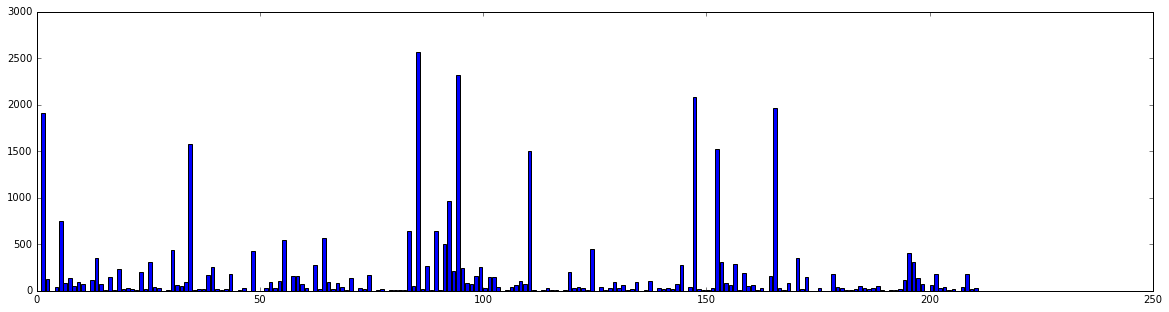

In [23]:
plt.figure (figsize=(20, 5))
plt.bar (range (len (country_clamped_collapsed_references)), country_clamped_collapsed_references.values ())

plt.show()

It seems legit that Israel and Afghanistan are being mentionned often.

The high occurence of Réunion and the alpha 'RE' look very suspicious. Looking at the raw references, we can see that all of the references to Réunion are due to it's alpha 'RE' and that happens to be a very common word in emails. We assume that Hilary Clinton has nothing important to say about Réunion and remove it.

The same goes for Norway where 'NO' is a very common negative word. Here we will only take into account the references to the full country name.

In [24]:
print('Occurences of Réunion due to "'"RE"'":', country_raw_references['RE'])
del country_clamped_references['RE']

print('Occurences of Norway due to "'"NO"'":', country_raw_references['NO'])
del country_clamped_references['NO']

Occurences of Réunion due to "RE": 1965
Occurences of Norway due to "NO": 2022


In [25]:
country_clamped_collapsed_references = collapseReferences (country_clamped_references, countries_raw)

country_occurences_clean = pd.DataFrame ()
country_occurences_clean ['Country'] = [countries_raw [i, 0] for i in country_clamped_collapsed_references.keys ()]
country_occurences_clean ['Alpha'] = [countries_raw [i, 1] for i in country_clamped_collapsed_references.keys ()]
country_occurences_clean ['Occurences'] = [o for o in country_clamped_collapsed_references.values ()]

country_occurences_clean.sort_values (['Occurences'], ascending=False).head ()

,Country,Alpha,Occurences
85,haiti,HT,2567
94,israel,IL,2324
1,afghanistan,AF,1913
34,china,CN,1581
152,pakistan,PK,1530


## Positive/Negative Perception

We saw in the first part of this task that countries are being referenced a lot of times. But are those references positive or negative ? Maybe also neutral. To achieve this, there are some steps we need to perform.

First, we'll have to filter out all emails having no mention to other countries at all, before doing some sentiment analysis. This will reduce the amount of computation to perform. We will thusly compute a liste of tuples, each tuple containing the email and a list of the countries being referenced to.

In [26]:
print ('Amount of emails : ', len (raw_emails))
print ('Max amount of emails with country references : ', country_occurences_clean ['Occurences'].sum ())

Amount of emails :  382920
Max amount of emails with country references :  29720


As we can see, there are at most 7.8% of the emails that are referencing other countries. Time for some filtering ( ͡° ͜ʖ ͡° )

In order to do this, we should create a map linking a country reference to a single country name.

In [27]:
country_reference_to_name = {}

for country in country_clamped_references.keys ():
    
    country_reference_to_name [country] = countries_raw [np.where (countries_raw == country) [0][0], 0]
    
country_reference_to_name ['FR']

'france'

Now, we can loop through every email, check every word in it to see if they are in this map's keys. If yes, we add them to a list of countries referenced in this email, if not, the email is simply dropped.

In [28]:
relevant_emails = []
refs = country_reference_to_name.keys ()

for email in raw_emails:
    
    tokens = word_tokenize (email)
    references = []
    
    for token in tokens:
        
        if token in refs:
            references.append (country_reference_to_name [token])
        elif token.lower () in refs:
            references.append (country_reference_to_name [token.lower ()])
            
    if len (references) > 0:
        relevant_emails.append ((email, set (references)))

print ('Amount of relevant emails : ', len (relevant_emails))

Amount of relevant emails :  24586


We basically kept 6.4% of the emails. What a filter. The machine learning won't take that much time now.

With this, we will now use a sentiment analyzer from NLTK to give polarity to each relevant email. We will then sum all the polarities for each country, as found by analyzing the emails.

In [29]:
sentiment_analyzer = SentimentIntensityAnalyzer ()
sentiments_by_country = {}

for email, references in relevant_emails:
    
    polarity = sentiment_analyzer.polarity_scores (email)
    
    for country in references:
        if country in sentiments_by_country:
            sentiments_by_country [country] ['neg'] += polarity ['neg']
            sentiments_by_country [country] ['neu'] += polarity ['neu']
            sentiments_by_country [country] ['pos'] += polarity ['pos']
        else:
            sentiments_by_country [country] = {'neg':polarity ['neg'], 'neu':polarity ['neu'], 'pos':polarity ['pos']}
            
sentiments_by_country ['switzerland']

{'neg': 1.0370000000000001,
 'neu': 44.71999999999999,
 'pos': 1.2429999999999999}

We can reshape this into a nice dataframe

In [30]:
sentiments_df = pd.DataFrame.from_dict (sentiments_by_country).transpose ()
sentiments_df.columns = ['Negative', 'Neutral', 'Positive']
sentiments_df.head ()

,Negative,Neutral,Positive
afghanistan,115.138,1607.596,138.279
albania,1.916,36.578,1.505
algeria,2.462,22.586,1.952
american samoa,4.354,73.499,7.151
andorra,33.387,643.012,48.598


To view a nice plot of it, we compute the the sum of positive positive sentiments and negative negative sentiments. This way, equal positive and negative sentiments balance each other out. The size and sign of the remaining value belongs to the sentiments that were in majority.

In the barplot we only show countries with sentiment values belonging to the 75 percentile.
A green bar depicts a positive sentiment and a red bar depicts a negative sentiment, the height show how severe the corresponding sentiment is.

In [31]:
sentiments_ratio_df = sentiments_df [['Positive', 'Negative']]
sentiments_ratio_df ['Ratio'] = sentiments_ratio_df ['Positive'] - sentiments_ratio_df ['Negative']
sentiments_ratio_df = sentiments_ratio_df.drop (['Positive', 'Negative'], axis = 1).sort_values (['Ratio'], ascending=False)
sentiments_ratio_df.reset_index (level = 0, inplace = True)
sentiments_ratio_df.rename (columns = {'index':'Country'}, inplace = True)
sentiments_ratio_df.head ()

,Country,Ratio
0,haiti,111.334
1,israel,74.143
2,china,46.511
3,ireland,27.506
4,palau,25.291


In [32]:
sentiments_ratio_df.tail()

,Country,Ratio
205,yemen,-8.408
206,libya,-8.672
207,tuvalu,-8.869
208,austria,-10.740
209,iraq,-15.438


In [33]:
interesting_sent = sentiments_ratio_df[np.abs(sentiments_ratio_df.Ratio )> 2]

In [34]:
interesting_sent['color'] = interesting_sent['Ratio'] > 0

/Users/mariedrieghe/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


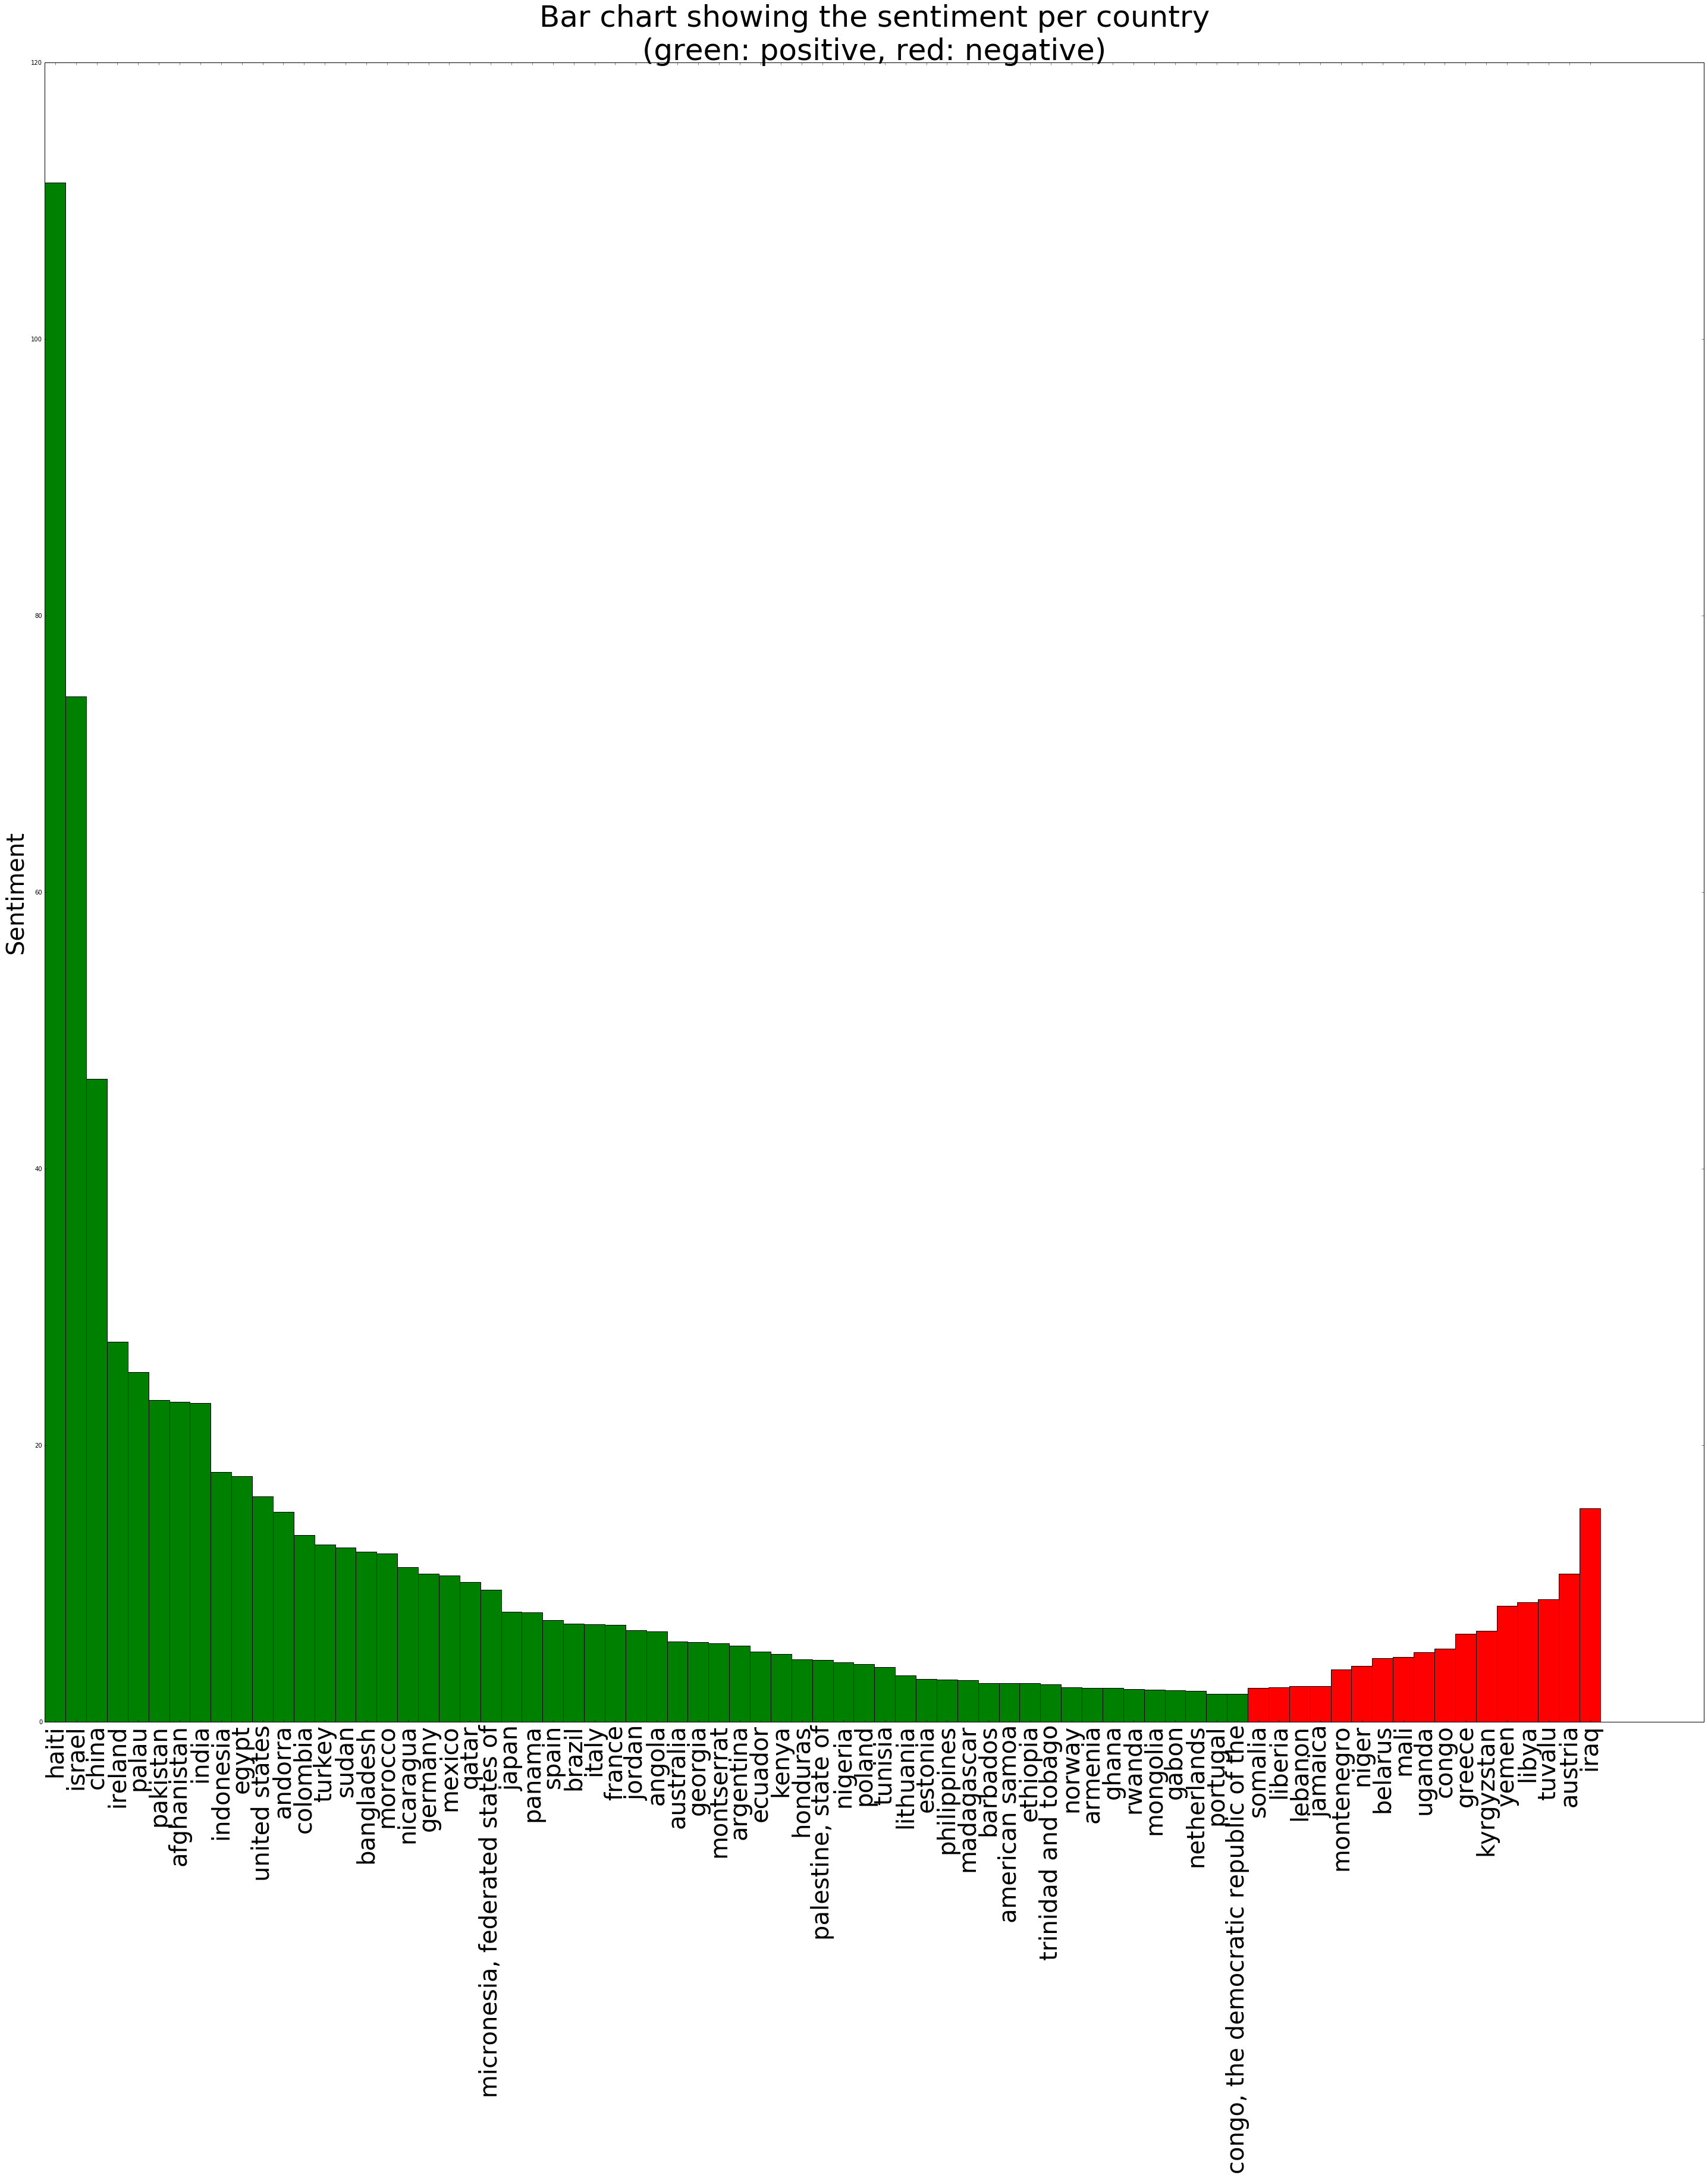

In [35]:
plt.figure(figsize=(50,50))
plt.bar(np.arange(len(interesting_sent)), np.abs(interesting_sent.Ratio), 1, color=interesting_sent.color.map({True: 'g', False: 'r'}))
plt.ylabel('Sentiment', rotation='vertical', fontsize=40)
plt.title('Bar chart showing the sentiment per country\n(green: positive, red: negative)', fontsize= 50)
ticks = plt.xticks(np.arange(len(interesting_sent)) + 0.5,interesting_sent.Country, rotation='vertical', fontsize = 40)

# Question 3: LDA

We run the LDA model considering each email as a document to try to find the topics.
We start by importing and extract the useful parts of the data (i.e. the body of the emails)
Then we build vectors from the words and run gensim

In [36]:
from gensim.models.ldamodel import LdaModel

/Users/mariedrieghe/anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [37]:
from gensim import corpora

In [38]:
from io import StringIO
contents = open('hillary-clinton-emails/Emails.csv', 'r', encoding='utf-8').read()
emails = pd.read_csv(StringIO(contents))

In [39]:
emails_list = emails['RawText'].values.tolist()

In [40]:
def cut_email(email):
    """For parsing emails: extracts main message text and repalces \n with spaces"""
    email = email.replace('\n',' ')
    index_start = email.find('Subject')
    index_end = index_start+email[index_start:].find('UNCLASSIFIED U.S. Department of State')
    return email[index_start:index_end]
cut_emails_list = list(map(cut_email, emails_list))
cut_emails_list[6]

'Subject: FW: Anti-Muslim film director in hiding, following Libya, Egypt violence From: Toiv, Nora F Sent: Wednesday, September 12, 2012 1:48 PM To: Mills, Cheryl D Subject: Anti-Muslim film director in hiding, following Libya, Egypt violence Anti-Muslim film director in hiding, following Libya, Egypt violence By Nia-Malika Henderson and Michelle Boorstein, Updated: Wednesday, September 12, 1:30 PM The director of a controversial anti-Islam film has gone into hiding, according to reports, fearing reprisals over a work that has sparked violence in Egypt and Libya and led to the deaths of four Americans. Sam Bacile, a California real estate developer, posted a 13-minute clip of "The Innocence of Muslims," in July, and the film became a lighting rod after the Egyptian media began showing parts of it on air and dubbed versions of the English-language film appeared on the Internet. It depicts the Prophet Muhammad as a bumbling idiot, born out of wedlock and making up verses to the Islamic 

In [41]:
# Define stop list (remove common email words)
stoplist = set(stopwords.words('english'))
stoplist.update(set(['subject:','fw:','to:','pm','from:','sent:', 're:','cc:', 'original', 'message', '-', '_']))

# Build texts according to gensim doc
texts = [[word for word in email.lower().split() if word not in stoplist] for email in cut_emails_list]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

texts = [[token for token in text if len(token) > 2]
         for text in texts]


In [42]:
# Build id->word dict
dictionary = corpora.Dictionary(texts)

In [43]:
# Get vector representation of words
corpus = [dictionary.doc2bow(text) for text in texts]

We choose 10 as the optimal parameter for the number of topics. Under 10, the topics don't make sense and above 10 a lot of redundant topics appear

In [44]:
# run model
lda = LdaModel(corpus, id2word=dictionary, num_topics=10)

In [45]:
lda.print_topics(-1)

[(0,
  '0.023*"office" + 0.018*"secretary\'s" + 0.013*"meeting" + 0.011*"state" + 0.009*"department" + 0.007*"room" + 0.007*"1.4(d)" + 0.007*"conference" + 0.007*"route" + 0.007*"arrive"'),
 (1,
  '0.016*"cheryl" + 0.014*"mills," + 0.011*"haiti" + 0.009*"speech" + 0.006*"jacob" + 0.006*"sullivan," + 0.005*"2009" + 0.004*"2010" + 0.004*"draft" + 0.004*"slaughter,"'),
 (2,
  '0.010*"2010" + 0.006*"good" + 0.005*"would" + 0.004*"cheryl" + 0.004*"know" + 0.004*"get" + 0.003*"mills," + 0.003*"i\'m" + 0.003*"jan" + 0.003*"like"'),
 (3,
  '0.008*"new" + 0.005*"would" + 0.005*"president" + 0.005*"said" + 0.004*"u.s." + 0.003*"united" + 0.003*"government" + 0.003*"obama" + 0.003*"one" + 0.003*"also"'),
 (4,
  '0.051*"2010" + 0.013*"call" + 0.007*"huma" + 0.006*"<hdr22@clintonemail.com>" + 0.005*"thu" + 0.004*"abedin," + 0.004*"lauren" + 0.004*"talk" + 0.004*"would" + 0.004*"jan"'),
 (5,
  '0.018*"feb" + 0.014*"2010" + 0.004*"jacob" + 0.004*"sullivan," + 0.004*"would" + 0.004*"subject" + 0.003*"